<a href="https://colab.research.google.com/github/Vrushti07/Synapse/blob/week3/Copy_of_Synapse_LP_Task_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 3**

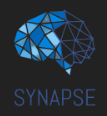

**Unsupervised Learning**

Unsupervised learning can be broken down into three main tasks:

1.   Clustering
2.   Association rules
3.   Dimensionality reduction

Let's explore these topics :))  

Clustering is an unsupervised learning technique used to group similar data points together. It's widely used in various applications like customer segmentation, anomaly detection, and more. In this task, we'll explore different clustering algorithms and visualize their results.

We will work with the Country dataset. This dataset consists of information that determine the socio-economic factors of a country - exports, imports, income, life expectancy, gdpp, etc. The main aim of this task is to find the countries which are in dire need of financial aid.

The dataset that will be used can be found here - [DATA](https://drive.google.com/drive/folders/1FMMMeniP32-G5j_s15S89z7LDlB1Xe9j?usp=drive_link)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from ipywidgets import interact
import os
import warnings
warnings.filterwarnings("ignore")

Mount your drive

In [ ]:
# code here
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# load the data
data = '/content/gdrive/MyDrive/Colab Notebooks/Country-data.csv'  # Mention the path in the strings below
df = pd.read_csv(data)

# Understanding the data

In [ ]:
# print 1st few rows of the dataset, its shape and the columns
print(df.head())
print(df.shape)
df.columns

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  
(167, 10)


Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
# check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
# check for any duplicated values
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
162,False
163,False
164,False
165,False


<Axes: >

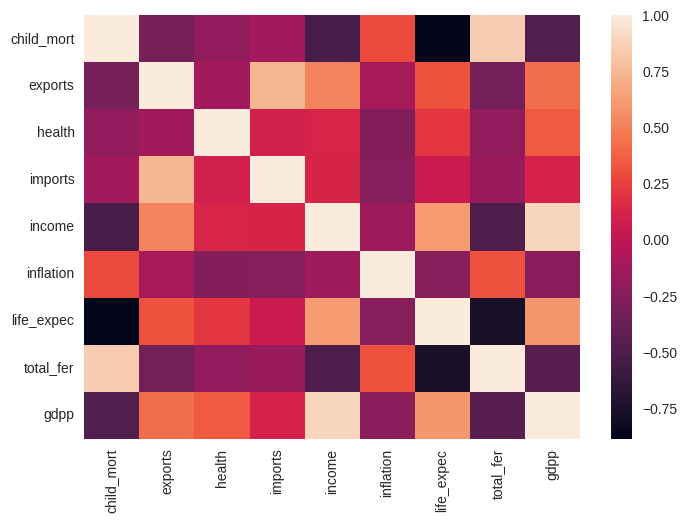

In [ ]:
# displaying the correlation matrix (heatmap)
# df1=df.drop('country', axis=1)
# print(df1.head())
# sns.heatmap(df1)
df_selected=df[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']]
df_selected.corr()
sns.heatmap(df_selected.corr())

Something really cool you can use to plot data other than Seaborn, Matplotlib, etc. is **Plotly**. Using this we can display how any feature here (import, gdpp or any of the others) varies country-wise.
And this can literally be plotted on the world map!

The official documentation- [Choropleth Maps](https://plotly.com/python/choropleth-maps/)

In [ ]:
countries_map = list(df.drop('country', axis = 1))
countries_map

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [ ]:
# explain what all the parameters mean here
for column in countries_map:
    fig = px.choropleth(df,      #for dataset
                       geojson = countries_map,         #This parameter defines the geographic boundaries that will be used to draw the map. This data provides the map boundaries for different countries.
                       locationmode = 'country names',   #This parameter tells Plotly how to interpret the location data in your DataFrame. Here, 'country names' means that the locations column contains the names of countries (e.g., 'France', 'Germany').
                       locations = 'country',     #This specifies the column in your DataFrame (df) that contains the location data, i.e., the names of the countries.
                       color = column,    #This parameter determines which column from the DataFrame will be used to color the countries on the map. The value of column will change for each iteration of the loop, meaning that each map will visualize a different variable from your DataFrame.
                       title = 'Country by ' + column,   #to give title
                       color_continuous_scale = 'Greens')    #sets the colour of the map

    fig.show()

# Pre-processing the data

In [ ]:
# Dropping the 'country' column for PCA and clustering
df.drop('country', axis=1, inplace=True)

Stnadardize the data

In [ ]:
# Initiate a StandardScaler object and fit it on the numeric columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)

# Dimensionality Reduction using PCA - Principal Component Analysis

Ref.: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Theory: https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643 and https://rlrocha.medium.com/choosing-the-number-of-components-of-principal-component-analysis-36902a887520

Theory + Implementation.: https://youtu.be/OFyyWcw2cyM (Jump to timestamp - 13:50 for PCA implementaion)

Before we start of with this, **explain what PCA is and why is it necessary?**

Answer:
The central idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of a large number of interrelated variables while retaining as much as possible of the variation present in the data set. This is achieved by transforming to a new set of variables, the principal components (PCs), which are uncorrelated, and which are ordered so that the first few retain most of the variation present in all of the original variables.
PCA is necessary for reducing the number of features in high-dimensional data, which helps simplify the data, reduce noise, prevent overfitting, and improve model performance. It also makes data easier to visualize and speeds up computation.
Some of the use cases of clustering algorithms include:
Document Clustering
Recommendation Engine
Image Segmentation
Market Segmentation
Search Result Grouping
and Anomaly Detection.
Uber’s route optimization, Amazon’s recommendation system, Netflix’s customer segmentation
1. Image Compression:
Scenario: You have high-resolution images, and you want to reduce their size without losing much detail.
PCA Usage: PCA can be applied to the pixel values of images to reduce dimensionality while preserving important features. This allows for compression by keeping only the most significant principal components.
2. Facial Recognition:
Scenario: In facial recognition systems, images of faces are often high-dimensional.
PCA Usage: PCA can reduce the dimensionality of face images by extracting the most important features (eigenfaces), making the recognition process faster and more accurate.
3. Finance (Portfolio Management):
Scenario: In finance, a portfolio may involve many correlated assets (stocks, bonds, etc.).
PCA Usage: PCA can reduce the number of correlated variables (e.g., stock returns) to a few principal components, making it easier to manage and analyze the portfolio.
4. Text Analysis:
Scenario: In natural language processing, text data (e.g., from documents) often has thousands of features (words or tokens).
PCA Usage: PCA can be used to reduce the dimensionality of text data after vectorization (e.g., TF-IDF), making the data more manageable for machine learning models.
5. Customer Segmentation:
Scenario: In marketing, you have customer data with numerous features (e.g., age, income, purchase behavior).
PCA Usage: PCA helps reduce the number of features, allowing for easier clustering and segmentation of customers based on the most significant patterns.

Reduce the number of dimensions using PCA,

Hints:
1. Initialise instance of PCA and set *n_components* to 0.9 and *random_state* to 20.
2. Fit data_scaled over the PCA instance created
3. Transform data_scaled over the fitted PCA instance and store it in a variable named data_pca.

In [ ]:
# code here
from sklearn.decomposition import PCA
pca=PCA(n_components=0.9, random_state=20)
pca.fit(scaled_data)
data_pca=pca.transform(scaled_data)
data_pca.shape

(167, 5)

Let's check the shape of data_pca

In [ ]:
# code here
# Should print (167, 5) if everything is correct.


Go through these and display the explained_variance_ratio_ and plot the same

Ref: https://saturncloud.io/blog/what-is-sklearn-pca-explained-variance-and-explained-variance-ratio-difference/ and https://www.jcchouinard.com/pca-explained-variance/

In [ ]:
# explained variance
explained_variance=pca.explained_variance_ratio_
#explained_variance gives absolute amount of variation while the ratio gives relative amount..absolute is helpful to know how many pc(principal components) to retain, while relative is helpful for how much info each pc contributes
explained_variance

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211])

Text(0.5, 1.0, 'Explained Variance by Principal Components')

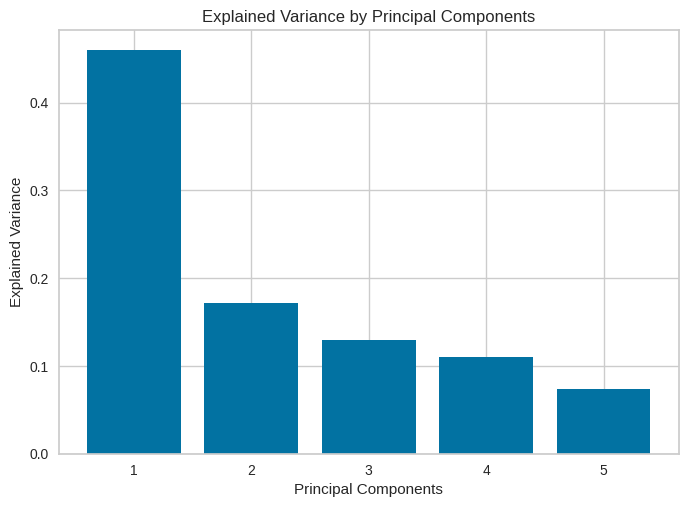

In [ ]:
# Plotting the explained variance
x = [1,2,3,4,5]
plt.bar(x, height=explained_variance)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')

What do you understand from this?

Answer: What I understood from this is that gradually the contribution of principal components decreases, that is the amount of information each principal component contributes to the overall structure of data decreases.

# K-Means Clustering (Partition-Based Clustering)

K-means clustering is an essential partitioning algorithm used to categorize a dataset into 'k' distinct, non-overlapping clusters. Each data point is assigned to the cluster with the nearest mean or centroid, symbolizing the cluster's center. The primary goal of the algorithm is to minimize the sum of squared distances between data points and their respective cluster centroids.

For an in-depth exploration of K-means clustering, you can refer to this comprehensive article on Analytics Vidhya: [Comprehensive Guide to K-means Clustering](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/).

For a deeper understanding of the mathematical underpinnings of K-means clustering, Wikipedia is a valuable resource. You can explore the Wikipedia page on K-means clustering for a detailed description: [K-means Clustering Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering). This will help you grasp the mathematical intricacies of the algorithm and its applications in machine learning.

**2 Dimensional Visualization**

In [ ]:
## Perform K-Means clustering with interactive widget - give it a second to load, when you change the no. of clusters
def kmeans_clustering(num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(data_pca)

    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

low = 1
high = 5
scale = 1
interact(kmeans_clustering, num_clusters=(low, high, scale))

interactive(children=(IntSlider(value=3, description='num_clusters', max=5, min=1), Output()), _dom_classes=('…

<function __main__.kmeans_clustering(num_clusters)>

**3 Dimensional Visualization**

In [ ]:
def kmeans_3d_clustering(num_clusters):
    kmeans_3d = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_3d_labels = kmeans_3d.fit_predict(data_pca)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=kmeans_3d_labels, cmap='viridis', edgecolors='k')
    ax.set_xlabel('Feature 1 (Standardized)')
    ax.set_ylabel('Feature 2 (Standardized)')
    ax.set_zlabel('Feature 3 (Standardized)')
    ax.set_title('Kmeans Clustering (3D)')
    plt.show()

interact(kmeans_3d_clustering, num_clusters=(1, 6, 1))

interactive(children=(IntSlider(value=3, description='num_clusters', max=6, min=1), Output()), _dom_classes=('…

<function __main__.kmeans_3d_clustering(num_clusters)>

# Elbow Point

The "elbow point" is a concept often used in the context of K-means clustering to help determine the optimal number of clusters (k) for a given dataset. It is a graphical method that can assist data analysts and machine learning practitioners in finding an appropriate value for k when applying K-means clustering.

The rationale behind the elbow point method is that as you increase the number of clusters (k), the sum of squared distances will generally decrease because data points will be closer to their respective cluster centroids. However, beyond a certain point, subdividing the data into more clusters doesn't provide significant improvements in reducing the sum of squared distances. The elbow point represents that optimal trade-off between the number of clusters and the compactness of each cluster.

It's important to note that the elbow point method is a heuristic and not a foolproof method for determining the ideal k value. In some cases, the elbow point may not be very pronounced, making it challenging to choose the best k. Additionally, the choice of k should also consider domain knowledge and the specific goals of your analysis.


Elbow Method to determine the number of clusters to be formed:


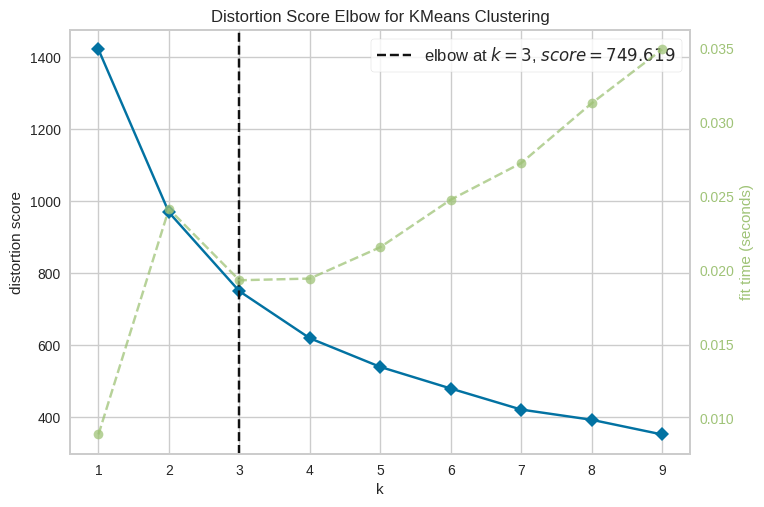

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')

Elbow_M = KElbowVisualizer(KMeans(), k=(1, 10))
Elbow_M.fit(data_pca)
Elbow_M.show()     #why does the graph change everytime and yet elbow point remains 3?

# Agglomerative Clustering

It is a hierarchical clustering algorithm used in unsupervised machine learning and data analysis. It is a "bottom-up" or "agglomerative" approach to clustering, where individual data points are initially treated as their own clusters and then progressively merged into larger clusters based on a similarity or distance metric. The result is a tree-like structure called a dendrogram that represents the hierarchical relationships between clusters.

As always, You can find more detailed information about hierarchical clustering, including agglomerative clustering, in the Wikipedia article on "Hierarchical clustering" at the following link: [Hierarchical Clustering Wikipedia](https://en.wikipedia.org/wiki/Hierarchical_clustering). This is the best resource for hierarchical clustering and it is advisable to go through it twice if possible! :)

More ref: https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

**2 Dimensional Visualization**

In [ ]:
# Perform Agglomerative clustering with interactive widget
def agglomerative_clustering(num_clusters):
  agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
  agglomerative_labels = agglomerative.fit_predict(data_pca) # write the code

  # write code for plotting
  plt.scatter(data_pca[:, 0], data_pca[:, 1], c=agglomerative_labels, cmap='viridis')
  plt.title(f'Agglomerative Clustering with {num_clusters} Clusters')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.show()

interact(agglomerative_clustering, num_clusters=(2, 10, 1))  # here as well

interactive(children=(IntSlider(value=6, description='num_clusters', max=10, min=2), Output()), _dom_classes=(…

<function __main__.agglomerative_clustering(num_clusters)>

Similar to classification and regression metrics, we have some [clustering metrics](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics) to evaluate performance.

We wll explore one of them: [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

In [ ]:
agglo = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = agglo.fit_predict(scaled_data)
silhouette = silhouette_score(scaled_data, labels)
silhouette

0.5620472870560562

Look into any 2 other metrics and give a brief explanation.

Do that here :)

**3 Dimensional Visualization**

In [ ]:
# Perform Agglomerative clustering with interactive widget
def agglomerative_3d_clustering(num_clusters):
    agglomerative_3d = AgglomerativeClustering(n_clusters=num_clusters)
    agglomerative_3d_labels = agglomerative_3d.fit_predict(data_pca) # write code here

    # plot
    fig=plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=agglomerative_3d_labels, cmap='viridis', s=50)

    ax.set_title(f"Agglomerative Clustering with {num_clusters} Clusters")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.set_zlabel("PCA Component 3")

    plt.show()

interact(agglomerative_3d_clustering, num_clusters=(3, 10, 1 )) # fill here

interactive(children=(IntSlider(value=6, description='num_clusters', max=10, min=3), Output()), _dom_classes=(…

<function __main__.agglomerative_3d_clustering(num_clusters)>

Look into what dendrograms are and plot them here.

Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

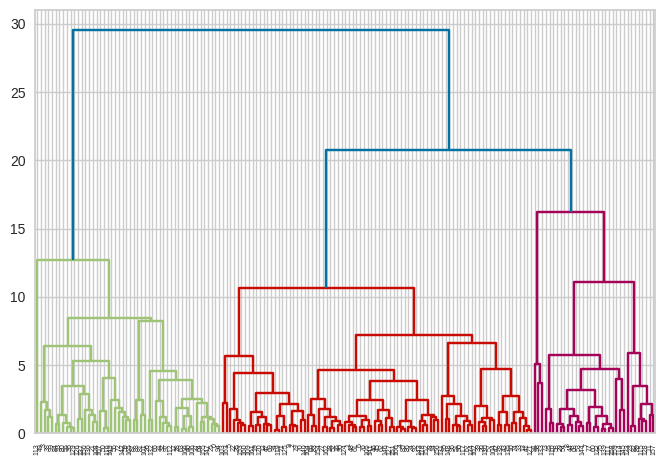

In [ ]:
# code here
from scipy.cluster import hierarchy
Z=hierarchy.linkage(data_pca, method='ward')     #specifying ward method is really imp as it ensures minimum variance within clusters
plt.figure()
dn=hierarchy.dendrogram(Z)

# DBSCAN Clustering

DBSCAN, which stands for Density-Based Spatial Clustering of Applications with Noise, is a popular density-based clustering algorithm in unsupervised machine learning. It is particularly useful for discovering clusters of arbitrary shapes in datasets with varying levels of data density. DBSCAN is known for its ability to handle noise and outliers effectively.

As always, You can find additional information about how DBSCAN clustering works in the following article on Analytics Vidhya:

[How DBSCAN Clustering Works](https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/#:~:text=DBSCAN%20is%20a%20density%2Dbased,points%20into%20a%20single%20cluster.)

This article provides a detailed explanation of DBSCAN, including its underlying concepts, the role of epsilon (ε) and minimum points (MinPts), and practical examples of how to use DBSCAN for clustering. It's a valuable resource for gaining a deeper understanding of the algorithm with Wikipedia as the side resource.

**2 Dimensional Visualization**

In [ ]:
# Perform DBSCAN clustering with interactive widget
def dbscan_clustering(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(data_pca) # code here

    # plot it
    plt.figure(figsize=(10,10))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis', s=50)
    plt.title('DBSCAN Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

interact(dbscan_clustering, eps=(0.1, 2, 0.1), min_samples=(1, 10, 1))  # enter values here

interactive(children=(FloatSlider(value=1.0, description='eps', max=2.0, min=0.1), IntSlider(value=5, descript…

<function __main__.dbscan_clustering(eps, min_samples)>

Need for DBSCAN Clustering:
K-Means and Hierarchical Clustering both fail in creating clusters of arbitrary shapes. They are not able to form clusters based on varying densities. That’s why we need DBSCAN Clustering.

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise.

DBSCAN is a density-based clustering algorithm that works on the assumption that clusters are dense regions in space separated by regions of lower density.It groups ‘densely grouped’ data points into a single cluster.

DBSCAN requires only two parameters: epsilon and minPoints. Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

DBSCAN creates a circle of epsilon radius around every data point and classifies them into Core point, Border point, and Noise. A data point is a Core point if the circle around it contains at least ‘minPoints’ number of points. If the number of points is less than minPoints, then it is classified as Border Point, and if there are no other data points around any data point within epsilon radius, then it treated as Noise.

**3 Dimensional Visualization**

In [ ]:
# Perform DBSCAN clustering with interactive widget
def dbscan_3d_clustering(eps, min_samples):
    # write the function yourselves here
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(data_pca)

    # plotting here
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=dbscan_labels, cmap='viridis', s=50)
    ax.set_title("DBSCAN Clustering 3D")
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')

    plt.show()

interact(dbscan_3d_clustering, eps=( 0.1, 2, 0.1), min_samples=(1, 10, 1))

interactive(children=(FloatSlider(value=1.0, description='eps', max=2.0, min=0.1), IntSlider(value=5, descript…

<function __main__.dbscan_3d_clustering(eps, min_samples)>

# Mean Shift Clustering

It is a density-based clustering algorithm used in unsupervised machine learning and data analysis. Similar to DBSCAN, Mean Shift is capable of discovering clusters with arbitrary shapes and sizes in a dataset. It is particularly useful for applications where the number of clusters is not known in advance and when clusters have varying densities.

For more hands-on information about the Mean Shift clustering algorithm, you can refer to this tutorial on Analytics India Magazine:

[Hands-On Tutorial on Mean Shift Clustering Algorithm](https://analyticsindiamag.com/hands-on-tutorial-on-mean-shift-clustering-algorithm/)

This tutorial provides practical insights into how to implement and use Mean Shift clustering, making it a valuable resource for those looking to apply this clustering technique to real-world data analysis and machine learning tasks especially in the sector of Image Segmentation.

**2 Dimensional Visualization**

In [ ]:
# Perform Mean Shift clustering with interactive widget
def meanshift_clustering(n_band):
    mean_shift = MeanShift(bandwidth=n_band)
    mean_shift_labels = mean_shift.fit_predict(data_pca) # code here

    #plot here
    plt.figure(figsize=(10, 10))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=mean_shift_labels, cmap='viridis', s=50)
    plt.title("Mean Shift Clustering 2D")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

interact(meanshift_clustering, n_band=(0.1, 2, 0.1)) # enter here

interactive(children=(FloatSlider(value=1.0, description='n_band', max=2.0, min=0.1), Output()), _dom_classes=…

<function __main__.meanshift_clustering(n_band)>

***Congratulations! You have explored various clustering algorithms. Each algorithm has its own advantages and use cases. Remember, choosing the right algorithm and the right number of clusters is crucial. Feel free to experiment with different datasets and parameters to gain a better understanding.***

# **Bonus: To be done only if you have completed the above tasks.**

In this task, we covered clustering and Dimensionality reduction. But still, one aspect of Unsupervised Learning is left to be covered- **Association rules**. Reseach about this topic and mention the different algos that exist.

 Also, look into the functioning of **Spectral Clustering algorithm** and mention it here :)

 The best reseach will be edited and featured on the Synapse Instagram page!!

RESEARCH TASK:


**Association rule learning**

Association rule learning is a machine learning method for discovering interesting relationships between variables in large databases. It is designed to detect strong rules in the database based on some interesting metrics. For any given multi-item transaction, association rules aim to obtain rules that determine how or why certain items are linked.

Association rules are created by searching for information on common if-then patterns and using specific criteria with support and trust to define what the key relationships are. They help to show the frequency of an item in a given data since confidence is defined by the number of times an if-then statement is found to be true. However, a third criterion called lift is often used to compare expected and actual confidence. Lift shows how many times the if-then statement was predicted to be true. Create association rules to compute itemsets based on data created by two or more items. Association rules usually consist of rules that are well represented by the data.

**How does Association Rule Learning work?**

Association rule learning is a type of unsupervised learning technique that checks for the dependency of one data item on another data item and maps accordingly so that it can be more profitable. It is based on different rules to discover the interesting relations between variables in the database. The association rule learning is one of the very important concepts of machine learning, and it is employed in Market Basket analysis, Web usage mining, continuous production, etc. Here market basket analysis is a technique used by the various big retailer to discover the associations between items.

Association rule learning works on the concept of If and Else Statement, such as if A then B.
Here the If element is called antecedent, and then statement is called as Consequent.

These types of relationships where we can find out some association or relation between two items is known as single cardinality. It is all about creating rules, and if the number of items increases, then cardinality also increases accordingly. So, to measure the associations between thousands of data items, there are several metrics. These metrics are given below:
* Support
* Confidence
* Lift

1. Support:
 Support is the frequency of A or how frequently an item appears in the dataset. It is defined as the fraction of the transaction T that contains the itemset X. If there are X datasets, then for transactions T, it can be written as:  
 Supp(X) = Freq(X) / T

2. Confidence:
Confidence indicates how often the rule has been found to be true. Or how often the items X and Y occur together in the dataset when the occurrence of X is already given. It is the ratio of the transaction that contains X and Y to the number of records that contain X.
Confidence = Freq(X,Y) / Freq(X)

3. Lift:
It is the strength of any rule, which can be defined as below formula: It is the ratio of the observed support measure and expected support if X and Y are independent of each other. It has three possible values:
 Lift = Supp(X,Y) / Supp(X)*Supp(Y)
* If Lift = 1: The probability of occurrence of antecedent and consequent is independent of each other.
* Lift > 1: It determines the degree to which the two itemsets are dependent to each other.
* Lift < 1: It tells us that one item is a substitute for other items, which means one item has a negative effect on another.

**Types of Association Rule Learning:**

Association rule learning can be divided into three algorithms:

1. Apriori Algorithm:

This algorithm uses frequent datasets to generate association rules. It is designed to work on the databases that contain transactions. This algorithm uses a breadth-first search and Hash Tree to calculate the itemset efficiently. It is mainly used for market basket analysis and helps to understand the products that can be bought together. It can also be used in the healthcare field to find drug reactions for patients.

2. Eclat Algorithm:

Eclat algorithm stands for Equivalence Class Transformation. This algorithm uses a depthfirst search technique to find frequent itemsets in a transaction database. It performs faster execution than Apriori Algorithm.

3. F-P Growth Algorithm:

The F-P growth algorithm stands for Frequent Pattern, and it is the improved version of the Apriori Algorithm. It represents the database in the form of a tree structure that is known as a frequent pattern or tree. The purpose of this frequent tree is to extract the most frequent pattern.

**Applications of Association Rule Learning:**

It has various applications in machine learning and data mining. Below are some popular applications of association rule learning:

* Market Basket Analysis: It is one of the popular examples and applications of association rule mining. This technique is commonly used by big retailers to determine the association between items.
* Medical Diagnosis: With the help of association rules, patients can be cured easily, as it helps in identifying the probability of illness for a particular disease.
* Protein Sequence: The association rules help in determining the synthesis of artificial Proteins.
* It is also used for the Catalog Design and Loss-leader Analysis and many more other applications.

**Spectral Clustering**

Spectral Clustering is a variant of the clustering algorithm that uses the connectivity between the data points to form the clustering. It uses eigenvalues and eigenvectors of the data matrix to forecast the data into lower dimensions space to cluster the data points. It is based on the idea of a graph representation of data where the data point are represented as nodes and the similarity between the data points are represented by an edge.

Spectral clustering is fundamentally grounded in spectral graph theory, which serves as the underpinning for comprehending its operational mechanism. Spectral graph theory treats data points as nodes within a graph, where the connections or edges linking these nodes depict pairwise similarity or affinity. The central concept is to leverage the eigenvalues and eigenvectors of a matrix derived from this graph to identify clusters. The Laplacian matrix, a pivotal matrix in spectral clustering, encapsulates the interrelations between data points within a graph structure. Through the calculation of eigenvalues and eigenvectors of this matrix, spectral clustering efficiently divides the data into clusters by exploiting the spectral characteristics inherent in the graph.

# **End of Task**

> ©DJS Synapse 2024 - 2025